In [1]:
import env
import agent
import numpy as np
import matplotlib.pyplot as plt

Env = env.Grid_1()
agent_1 = agent.ValueIteration(Env)
agent_2 = agent.PolicyIteration(Env)
agent_3 = agent.ConfusedAgent(Env)

In [2]:
def plot(Env,policy,V):
	pp = np.reshape(np.argmax(policy, axis=1), Env.shape)
	print(pp)

	plt.matshow(np.reshape(V, Env.shape))
	# plt.arrow(0,0.5,0,-0.7,head_width = 0.1)



	for i in range(Env.shape[0]):
		for j in range(Env.shape[1]):
			if i == (Env.shape[0]-1) and j == (Env.shape[1]-1):
				continue
			if pp[i][j] == 0:
				plt.arrow(j,i+0.5,0,-0.7,head_width = 0.1)
			elif pp[i][j] == 2:
				plt.arrow(j,i-0.5,0,+0.7,head_width = 0.1)
			elif pp[i][j] == 1:
				plt.arrow(j-0.5,i,0.7,0,head_width = 0.1)
			elif pp[i][j] == 3:
				plt.arrow(j+0.5,i,-0.7,0,head_width = 0.1)

	plt.show()

## Value-Iteration

137
[[-3.57039384 -3.37276099 -3.02796805 -2.99133828 -2.96940232 -2.9150723
  -2.82325816 -2.92320722]
 [-3.63715377 -3.02796805 -2.4559645  -2.56737406 -2.79601271 -2.49973572
  -2.26182221 -2.19984323]
 [-3.03283485 -2.4559645  -2.32266296 -2.34249321 -2.04451313 -2.18757001
  -1.54756155 -1.86418034]
 [-2.74980583 -2.20831698 -1.93757149 -1.87011186 -1.40942913 -1.25774406
  -1.00779558 -1.18170867]
 [-2.20831698 -1.93757149 -1.87011186 -1.40942913 -1.25774406 -1.00779558
  -0.92164714 -0.79313532]
 [-2.9372657  -2.20831698 -1.89623918 -1.73843138 -0.76431002 -0.92164714
  -0.79313532 -0.60991696]
 [-2.47427722 -2.33656422 -1.73843138 -0.76431002 -0.46487131 -0.28775317
  -0.02935994  0.        ]
 [-2.77283074 -1.84293579 -1.28294968 -0.46487131 -0.28775317 -0.02935994
   0.          0.        ]]
[[1 1 2 1 1 2 2 2]
 [2 1 2 2 2 2 2 2]
 [1 1 2 2 2 2 2 2]
 [1 2 2 2 2 2 2 2]
 [1 1 1 1 1 1 2 2]
 [1 0 1 2 2 1 1 2]
 [1 1 1 1 2 2 2 2]
 [1 1 1 1 1 1 1 0]]


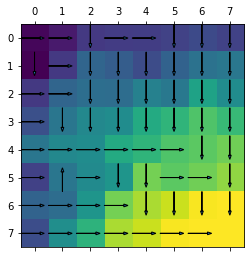

In [3]:
### Value Iteration
# agent_1.set_gamma(0.5)
agent_1.clear()
itr = 0
while True:
    agent_1.reset()
    agent_1.update()
    
    if agent_1.get_delta() < agent_1.get_threshold():
        break
    itr += 1
    
print(itr)
policy = agent_1.get_policy()
print(np.reshape(agent_1.V,Env.shape))
plot(Env,policy,agent_1.V)
# agent_1.clear()

## Policy-Iteration

[[-3.57039384 -3.37276099 -3.02796805 -2.99133828 -2.96940232 -2.9150723
  -2.82325816 -2.92320722]
 [-3.63715377 -3.02796805 -2.4559645  -2.56737406 -2.79601271 -2.49973572
  -2.26182221 -2.19984323]
 [-3.03283485 -2.4559645  -2.32266296 -2.34249321 -2.04451313 -2.18757001
  -1.54756155 -1.86418034]
 [-2.74980583 -2.20831698 -1.93757149 -1.87011186 -1.40942913 -1.25774406
  -1.00779558 -1.18170867]
 [-2.20831698 -1.93757149 -1.87011186 -1.40942913 -1.25774406 -1.00779558
  -0.92164714 -0.79313532]
 [-2.9372657  -2.20831698 -1.89623918 -1.73843138 -0.76431002 -0.92164714
  -0.79313532 -0.60991696]
 [-2.47427722 -2.33656422 -1.73843138 -0.76431002 -0.46487131 -0.28775317
  -0.02935994  0.        ]
 [-2.77283074 -1.84293579 -1.28294968 -0.46487131 -0.28775317 -0.02935994
   0.          0.        ]]
[[1 1 2 1 1 2 2 2]
 [2 1 2 2 2 2 2 2]
 [1 1 2 2 2 2 2 2]
 [1 2 2 2 2 2 2 2]
 [1 1 1 1 1 1 2 2]
 [1 0 1 2 2 1 1 2]
 [1 1 1 1 2 2 2 2]
 [1 1 1 1 1 1 1 0]]


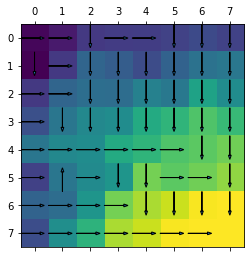

In [4]:
### Policy Iteration
# agent_2.set_gamma(0.5)
agent_2.clear()
while True:
    V = agent_2.evaluate_policy()
    # print(V)

    stable = agent_2.update()

    if stable == True:
        break
        
print(np.reshape(agent_2.V,Env.shape))
plot(Env,agent_2.policy,agent_2.V)
# agent_2.clear()

[[-0.97766061 -1.95532122 -0.57200356 -0.52635142 -1.49239573 -0.17675003
  -0.56143596 -0.73818599]
 [-0.58919743 -0.57200356 -0.52635142 -1.09835497 -1.51433168 -0.56143596
  -0.73818599 -0.72336399]
 [-0.57687035 -0.13330154 -1.09835497 -0.75149958 -0.97638042 -0.92982595
  -0.53976597 -1.25402663]
 [-0.73471788 -0.2707455  -1.23165651 -0.46068273 -0.15168507 -0.53976597
  -1.25402663 -1.7937926 ]
 [-0.86726195 -1.60197983 -1.61674799 -0.93306408 -1.39374681 -1.46959193
  -1.7937926  -2.47626427]
 [-0.8532185  -1.72048045 -2.44942917 -1.39374681 -0.29943871 -0.82827931
  -0.97758228 -0.18321836]
 [-0.8532185  -0.92989494 -1.06760795 -0.81807837 -0.17711814 -0.97758228
  -1.10609411 -2.05537465]
 [-0.09913888 -1.06760795 -0.55998611 -1.79219973 -0.47655685 -0.02935994
  -0.02935994  0.        ]]
[[0 3 2 2 3 1 2 3]
 [3 1 1 3 0 1 0 1]
 [1 1 0 1 3 2 2 3]
 [2 2 0 2 2 1 0 3]
 [2 3 0 0 3 0 0 0]
 [2 3 3 0 2 2 3 1]
 [3 2 3 2 2 0 0 3]
 [3 0 2 0 0 1 2 3]]


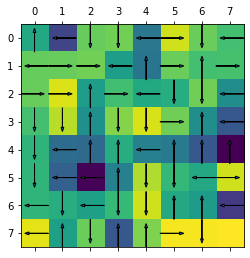

In [5]:
agent_3.get_policy()
print(np.reshape(agent_3.V,Env.shape))
plot(Env,agent_3.policy,agent_3.V)

# Part-c

In [6]:
def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
    # plot the shaded range of the confidence intervals
    plt.fill_between(range(mean.shape[0]), ub, lb,
                     color=color_shading, alpha=.5)
    # plot the mean on top
    plt.plot(mean, color_mean)

[ 0.         -0.18949568 -0.33634727 -0.46216815 -0.56379552 -0.66224192
 -0.75043371 -0.83697861 -0.91465756 -0.97755356 -1.02556328 -1.06552332
 -1.09822834 -1.1263951  -1.15076388 -1.17206282 -1.18998834 -1.20543876
 -1.22088917 -1.23551426 -1.24907288 -1.2624427  -1.27565856 -1.28735868
 -1.2990255  -1.31052242 -1.32029745 -1.33007247 -1.33979972 -1.34802571
 -1.35625169 -1.36447767 -1.37270365 -1.38092964 -1.38915562 -1.39717837
 -1.4050616  -1.41294484 -1.42079636 -1.42833685 -1.43587733 -1.44341782
 -1.45064288 -1.45752519 -1.46406475 -1.47057699 -1.47708923 -1.48360146
 -1.4901137  -1.49662594 -1.50313817 -1.50965041 -1.51590059 -1.52207008
 -1.52823956 -1.53440905 -1.54057854 -1.54654521 -1.55237195 -1.55819869
 -1.56402543 -1.56973092 -1.57521491 -1.5806989  -1.58618289 -1.59137857
 -1.59651981 -1.60166105 -1.60680228 -1.61194352 -1.61708476 -1.622226
 -1.62736724 -1.63225819 -1.63705668 -1.64185517 -1.64665366 -1.65145215
 -1.65625064 -1.66104913 -1.66584762 -1.67041115 -1.6

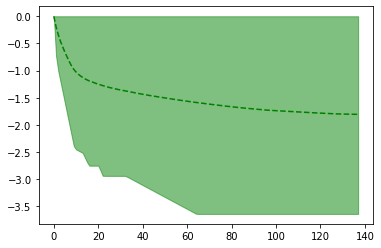

In [7]:
agent_1.clear()

mu = []
low = []
high = []

while True:
    agent_1.reset()
    agent_1.update()
    
    mu.append((np.matrix(np.reshape(agent_1.V,Env.shape))).mean())
    low.append((np.matrix(np.reshape(agent_1.V,Env.shape))).min())
    high.append((np.matrix(np.reshape(agent_1.V,Env.shape))).max())
    
    if agent_1.get_delta() < agent_1.get_threshold():
        break
        
mu = np.array(mu)
high = np.array(high)
low = np.array(low)

print(mu)
plot_mean_and_CI(mu, high, low, color_mean='g--', color_shading='g')





[-143.07700588   -2.2743683    -1.90726827   -1.83154741   -1.80550241
   -1.80485659]


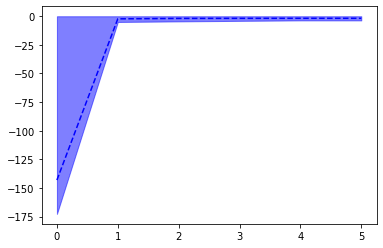

In [8]:
agent_2.clear()
mu = []
low = []
high = []

while True:
    V = agent_2.evaluate_policy()
    
    mu.append((np.matrix(np.reshape(V,Env.shape))).mean())
    low.append((np.matrix(np.reshape(V,Env.shape))).min())
    high.append((np.matrix(np.reshape(V,Env.shape))).max())
    
    stable = agent_2.update()
    
    if stable == True:
        break
        
mu = np.array(mu)
high = np.array(high)
low = np.array(low)

print(mu)
plot_mean_and_CI(mu, high, low, color_mean='b--', color_shading='b')

[ -0.83068904  -1.66913529  -2.86230246  -3.33900837  -4.34130764
  -5.45137457  -6.30677954  -7.1209753   -7.90131383  -8.68530062
  -9.74067375 -10.87004225 -12.05993135 -12.84922657 -14.09728491
 -14.90566173 -16.13303851 -17.61991422 -18.56907118 -19.35194727
 -20.53069484 -21.65981804 -21.23310109 -22.4900607  -23.24999367
 -23.81632195 -24.53865954 -25.25884338 -27.44453902 -27.62882624
 -28.60841471 -29.41310762 -30.92831169 -31.30694697 -32.45492288
 -32.79238627 -31.37492449 -31.6311461  -32.25065469 -33.84833456
 -33.24741103 -33.67528825 -32.05411789 -33.60137773 -38.60774277
 -40.86947423 -43.00099401 -43.62514903 -41.98999992 -39.42620313
 -35.72713724 -34.97651594 -37.1566499  -38.84871957 -39.78762688
 -43.12632637 -39.23352849 -40.23782854 -40.25856682 -40.75546298
 -40.18063741 -41.20686639 -44.19174626 -39.52942082 -32.4960984
 -33.22983173 -41.35102877 -41.80938995 -46.61209224 -54.07525594
 -53.0118316  -54.07013013 -55.09614979 -55.64865358 -57.1315193
 -55.6566186

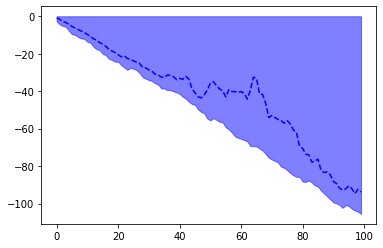

In [9]:
agent_3.clear()
mu = []
low = []
high = []

for i in range(100):
    agent_3.get_policy()
    
    mu.append((np.matrix(np.reshape(agent_3.V,Env.shape))).mean())
    low.append((np.matrix(np.reshape(agent_3.V,Env.shape))).min())
    high.append((np.matrix(np.reshape(agent_3.V,Env.shape))).max())
        
mu = np.array(mu)
high = np.array(high)
low = np.array(low)

print(mu)
plot_mean_and_CI(mu, high, low, color_mean='b--', color_shading='b')

## Comparison of different policies with different values of $\gamma$

### Value Iteration

### $\gamma = 0$

[[-0.19763285 -0.19763285 -0.19763285 -0.02193595 -0.02193595 -0.02193595
  -0.05433002 -0.17675003]
 [-0.58919743 -0.19763285 -0.13330154 -0.22488085 -0.02193595 -0.05433002
  -0.17675003 -0.24272868]
 [-0.41311932 -0.13330154 -0.22488085 -0.13330154 -0.22488085 -0.41533658
  -0.3121657  -0.33566289]
 [-0.41311932 -0.2707455  -0.06745963 -0.22488085 -0.15168507 -0.24994848
  -0.08614844 -0.33566289]
 [-0.2707455  -0.06745963 -0.2707455  -0.06745963 -0.24994848 -0.08614844
  -0.12851182 -0.08614844]
 [-0.72894872 -0.137713   -0.06745963 -0.46068273 -0.14930297 -0.12851182
  -0.08614844 -0.12851182]
 [-0.09913888 -0.59813284 -0.137713   -0.1578078  -0.17711814 -0.14930297
  -0.02935994  0.        ]
 [-0.09913888 -0.09913888 -0.55998611 -0.17711814 -0.17711814 -0.02935994
   0.          0.        ]]
[[1 0 3 1 0 3 3 3]
 [3 0 2 2 0 0 0 0]
 [2 1 1 3 3 0 3 1]
 [3 2 2 0 2 2 2 0]
 [1 1 3 3 1 1 2 3]
 [1 2 0 0 1 1 0 3]
 [2 1 3 0 2 0 2 2]
 [2 3 2 1 2 1 1 0]]


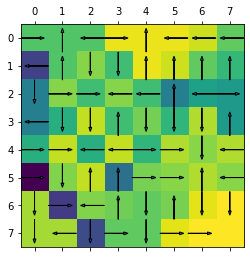

In [10]:
agent_1.clear()

# policies_value = []
# V_value = []

agent_1.set_gamma(0)
while True:
    agent_1.reset()
    agent_1.update()
    
    if agent_1.get_delta() < agent_1.get_threshold():
        break
        
policy = agent_1.get_policy()
print(np.reshape(agent_1.V,Env.shape))
plot(Env,policy,agent_1.V)

### $\gamma = 0.1$

[[-0.21958986 -0.21958986 -0.21958986 -0.02437304 -0.02437304 -0.02437304
  -0.05676711 -0.18242652]
 [-0.65021648 -0.21958986 -0.15736085 -0.2406156  -0.02437304 -0.05676711
  -0.18242652 -0.26097112]
 [-0.45901688 -0.15736085 -0.2406156  -0.15736085 -0.2406156  -0.42101307
  -0.35426679 -0.37295504]
 [-0.45901688 -0.28029345 -0.09548626 -0.2406156  -0.17767853 -0.25994744
  -0.09999823 -0.37295504]
 [-0.28029345 -0.09548626 -0.28029345 -0.09548626 -0.25994744 -0.09999823
  -0.13851078 -0.09999823]
 [-0.74889887 -0.19951532 -0.09548626 -0.47023068 -0.16315277 -0.13851078
  -0.09999823 -0.13851078]
 [-0.11015321 -0.61808299 -0.19951532 -0.20482816 -0.19679596 -0.16315277
  -0.02935994  0.        ]
 [-0.11015321 -0.11015321 -0.61808299 -0.19679596 -0.19679596 -0.02935994
   0.          0.        ]]
[[1 0 3 1 0 3 3 3]
 [2 0 2 2 0 0 0 0]
 [2 1 1 3 3 0 3 1]
 [3 2 2 0 2 2 2 0]
 [1 1 3 3 1 1 2 3]
 [1 2 0 0 1 1 0 3]
 [2 1 3 0 2 0 2 2]
 [2 3 0 1 2 1 1 0]]


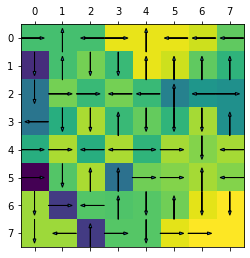

In [11]:
agent_1.clear()

# policies_value = []
# V_value = []

agent_1.set_gamma(0.1)
while True:
    agent_1.reset()
    agent_1.update()
    
    if agent_1.get_delta() < agent_1.get_threshold():
        break
        
policy = agent_1.get_policy()
print(np.reshape(agent_1.V,Env.shape))
plot(Env,policy,agent_1.V)

### $\gamma = 0.5$

[[-0.39525967 -0.39525967 -0.39525967 -0.04387124 -0.04387124 -0.04387124
  -0.07626531 -0.21488235]
 [-0.97466308 -0.39525967 -0.32765095 -0.38870289 -0.04387124 -0.07626531
  -0.21488235 -0.35016953]
 [-0.74069239 -0.32765095 -0.38870289 -0.32765095 -0.38870289 -0.4534689
  -0.53889982 -0.67131554]
 [-0.74446826 -0.40596088 -0.27043904 -0.38870289 -0.32679104 -0.35021455
  -0.20053607 -0.48883943]
 [-0.40596088 -0.27043904 -0.40596088 -0.27043904 -0.35021455 -0.20053607
  -0.2287779  -0.20053607]
 [-0.93192813 -0.40596088 -0.27043904 -0.59589812 -0.26369061 -0.2287779
  -0.20053607 -0.2287779 ]
 [-0.19827473 -0.88930555 -0.58236368 -0.45575583 -0.31365474 -0.26369061
  -0.02935994  0.        ]
 [-0.19827473 -0.19827473 -0.88930555 -0.31365474 -0.2730732  -0.02935994
   0.          0.        ]]
[[1 0 3 1 0 3 3 3]
 [2 0 2 2 0 0 0 0]
 [1 1 1 3 3 0 3 1]
 [1 2 2 0 2 2 2 2]
 [1 1 3 3 1 1 2 3]
 [1 0 0 0 1 1 0 3]
 [2 1 3 0 2 0 2 2]
 [2 3 0 1 1 1 1 0]]


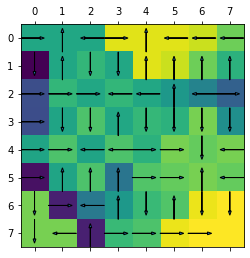

In [12]:
agent_1.clear()

# policies_value = []
# V_value = []

agent_1.set_gamma(0.5)
while True:
    agent_1.reset()
    agent_1.update()
    
    if agent_1.get_delta() < agent_1.get_threshold():
        break
        
policy = agent_1.get_policy()
print(np.reshape(agent_1.V,Env.shape))
plot(Env,policy,agent_1.V)

### $\gamma = 0.75$

[[-0.79050628 -0.79050628 -0.79050628 -0.08774103 -0.08774103 -0.08774103
  -0.1201351  -0.26685066]
 [-1.40191557 -0.79050628 -0.69017732 -0.74250669 -0.08774103 -0.1201351
  -0.26685066 -0.44286598]
 [-1.09449619 -0.69017732 -0.74250669 -0.69017732 -0.69124291 -0.50543721
  -0.69124291 -1.05551277]
 [-1.09233814 -0.73446858 -0.61830891 -0.74250669 -0.57381756 -0.56284697
  -0.41720344 -0.70147185]
 [-0.73446858 -0.61830891 -0.73446858 -0.57381756 -0.56284697 -0.41720344
  -0.44141032 -0.41720344]
 [-1.15062254 -0.73446858 -0.61830891 -0.89104182 -0.48035797 -0.44141032
  -0.41720344 -0.44141032]
 [-0.39654291 -1.15062254 -1.00067676 -0.59000973 -0.38742803 -0.28041319
  -0.02935994  0.        ]
 [-0.39654291 -0.39654291 -1.10864939 -0.38742803 -0.28041319 -0.02935994
   0.          0.        ]]
[[1 0 3 1 0 3 3 3]
 [1 0 2 2 0 0 0 0]
 [1 1 1 3 1 0 3 0]
 [1 2 2 0 2 2 2 2]
 [1 1 3 1 1 1 2 3]
 [2 0 0 0 1 1 0 3]
 [2 3 3 1 2 2 2 2]
 [2 3 1 1 1 1 1 0]]


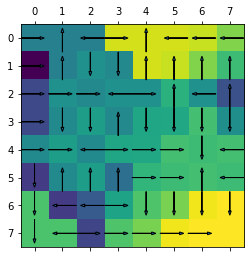

In [13]:
agent_1.clear()

# policies_value = []
# V_value = []

agent_1.set_gamma(0.75)
while True:
    agent_1.reset()
    agent_1.update()
    
    if agent_1.get_delta() < agent_1.get_threshold():
        break
        
policy = agent_1.get_policy()
print(np.reshape(agent_1.V,Env.shape))
plot(Env,policy,agent_1.V)

### $\gamma = 1$


[[-3.57039384 -3.37276099 -3.02796805 -2.99133828 -2.96940232 -2.9150723
  -2.82325816 -2.92320722]
 [-3.63715377 -3.02796805 -2.4559645  -2.56737406 -2.79601271 -2.49973572
  -2.26182221 -2.19984323]
 [-3.03283485 -2.4559645  -2.32266296 -2.34249321 -2.04451313 -2.18757001
  -1.54756155 -1.86418034]
 [-2.74980583 -2.20831698 -1.93757149 -1.87011186 -1.40942913 -1.25774406
  -1.00779558 -1.18170867]
 [-2.20831698 -1.93757149 -1.87011186 -1.40942913 -1.25774406 -1.00779558
  -0.92164714 -0.79313532]
 [-2.9372657  -2.20831698 -1.89623918 -1.73843138 -0.76431002 -0.92164714
  -0.79313532 -0.60991696]
 [-2.47427722 -2.33656422 -1.73843138 -0.76431002 -0.46487131 -0.28775317
  -0.02935994  0.        ]
 [-2.77283074 -1.84293579 -1.28294968 -0.46487131 -0.28775317 -0.02935994
   0.          0.        ]]
[[1 1 2 1 1 2 2 2]
 [2 1 2 2 2 2 2 2]
 [1 1 2 2 2 2 2 2]
 [1 2 2 2 2 2 2 2]
 [1 1 1 1 1 1 2 2]
 [1 0 1 2 2 1 1 2]
 [1 1 1 1 2 2 2 2]
 [1 1 1 1 1 1 1 0]]


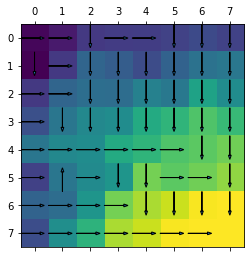

In [14]:
agent_1.clear()

# policies_value = []
# V_value = []

agent_1.set_gamma(1)
while True:
    agent_1.reset()
    agent_1.update()
    
    if agent_1.get_delta() < agent_1.get_threshold():
        break
        
policy = agent_1.get_policy()
print(np.reshape(agent_1.V,Env.shape))
plot(Env,policy,agent_1.V)

# Policy Iteration

### $\gamma = 0$

[[-0.19763285 -0.19763285 -0.19763285 -0.02193595 -0.02193595 -0.02193595
  -0.05433002 -0.17675003]
 [-0.58919743 -0.19763285 -0.13330154 -0.22488085 -0.02193595 -0.05433002
  -0.17675003 -0.24272868]
 [-0.41311932 -0.13330154 -0.22488085 -0.13330154 -0.22488085 -0.41533658
  -0.3121657  -0.33566289]
 [-0.41311932 -0.2707455  -0.06745963 -0.22488085 -0.15168507 -0.24994848
  -0.08614844 -0.33566289]
 [-0.2707455  -0.06745963 -0.2707455  -0.06745963 -0.24994848 -0.08614844
  -0.12851182 -0.08614844]
 [-0.72894872 -0.137713   -0.06745963 -0.46068273 -0.14930297 -0.12851182
  -0.08614844 -0.12851182]
 [-0.09913888 -0.59813284 -0.137713   -0.1578078  -0.17711814 -0.14930297
  -0.02935994  0.        ]
 [-0.09913888 -0.09913888 -0.55998611 -0.17711814 -0.17711814 -0.02935994
   0.          0.        ]]
[[1 0 3 1 0 3 3 3]
 [3 0 2 2 0 0 0 0]
 [2 1 1 3 3 0 3 1]
 [3 2 2 0 2 2 2 0]
 [1 1 3 3 1 1 2 3]
 [1 2 0 0 1 1 0 3]
 [2 1 3 0 2 0 2 2]
 [2 3 2 1 2 1 1 0]]


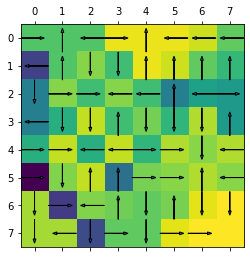

In [15]:
agent_2.clear()
agent_2.set_gamma(0)
while True:
    V = agent_2.evaluate_policy()
    # print(V)

    stable = agent_2.update()

    if stable == True:
        break
        
print(np.reshape(agent_2.V,Env.shape))
plot(Env,agent_2.policy,agent_2.V)

### $\gamma = 0.1$


[[-0.21958986 -0.21958986 -0.21958986 -0.02437304 -0.02437304 -0.02437304
  -0.05676711 -0.18242652]
 [-0.65021648 -0.21958986 -0.15736085 -0.2406156  -0.02437304 -0.05676711
  -0.18242652 -0.26097112]
 [-0.45901688 -0.15736085 -0.2406156  -0.15736085 -0.2406156  -0.42101307
  -0.35426679 -0.37295504]
 [-0.45901688 -0.28029345 -0.09548626 -0.2406156  -0.17767853 -0.25994744
  -0.09999823 -0.37295504]
 [-0.28029345 -0.09548626 -0.28029345 -0.09548626 -0.25994744 -0.09999823
  -0.13851078 -0.09999823]
 [-0.74889887 -0.19951532 -0.09548626 -0.47023068 -0.16315277 -0.13851078
  -0.09999823 -0.13851078]
 [-0.11015321 -0.61808299 -0.19951532 -0.20482816 -0.19679596 -0.16315277
  -0.02935994  0.        ]
 [-0.11015321 -0.11015321 -0.61808299 -0.19679596 -0.19679596 -0.02935994
   0.          0.        ]]
[[1 0 3 1 0 3 3 3]
 [2 0 2 2 0 0 0 0]
 [2 1 1 3 3 0 3 1]
 [3 2 2 0 2 2 2 0]
 [1 1 3 3 1 1 2 3]
 [1 2 0 0 1 1 0 3]
 [2 1 3 0 2 0 2 2]
 [2 3 0 1 2 1 1 0]]


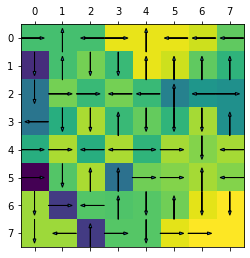

In [16]:
agent_2.clear()
agent_2.set_gamma(0.1)
while True:
    V = agent_2.evaluate_policy()
    # print(V)

    stable = agent_2.update()

    if stable == True:
        break
        
print(np.reshape(agent_2.V,Env.shape))
plot(Env,agent_2.policy,agent_2.V)

### $\gamma = 0.5$

[[-0.39525967 -0.39525967 -0.39525967 -0.04387124 -0.04387124 -0.04387124
  -0.07626531 -0.21488235]
 [-0.97466308 -0.39525967 -0.32765095 -0.38870289 -0.04387124 -0.07626531
  -0.21488235 -0.35016953]
 [-0.74069239 -0.32765095 -0.38870289 -0.32765095 -0.38870289 -0.4534689
  -0.53889982 -0.67131554]
 [-0.74446826 -0.40596088 -0.27043904 -0.38870289 -0.32679104 -0.35021455
  -0.20053607 -0.48883943]
 [-0.40596088 -0.27043904 -0.40596088 -0.27043904 -0.35021455 -0.20053607
  -0.2287779  -0.20053607]
 [-0.93192813 -0.40596088 -0.27043904 -0.59589812 -0.26369061 -0.2287779
  -0.20053607 -0.2287779 ]
 [-0.19827473 -0.88930555 -0.58236368 -0.45575583 -0.31365474 -0.26369061
  -0.02935994  0.        ]
 [-0.19827473 -0.19827473 -0.88930555 -0.31365474 -0.2730732  -0.02935994
   0.          0.        ]]
[[1 0 3 1 0 3 3 3]
 [2 0 2 2 0 0 0 0]
 [1 1 1 3 3 0 3 1]
 [1 2 2 0 2 2 2 2]
 [1 1 3 3 1 1 2 3]
 [1 0 0 0 1 1 0 3]
 [2 1 3 0 2 0 2 2]
 [2 3 0 1 1 1 1 0]]


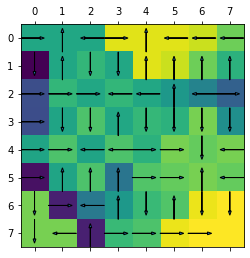

In [17]:
agent_2.clear()
agent_2.set_gamma(0.5)
while True:
    V = agent_2.evaluate_policy()
    # print(V)

    stable = agent_2.update()

    if stable == True:
        break
        
print(np.reshape(agent_2.V,Env.shape))
plot(Env,agent_2.policy,agent_2.V)

### $\gamma = 0.75$

[[-0.79050628 -0.79050628 -0.79050628 -0.08774103 -0.08774103 -0.08774103
  -0.1201351  -0.26685066]
 [-1.40191557 -0.79050628 -0.69017732 -0.74250669 -0.08774103 -0.1201351
  -0.26685066 -0.44286598]
 [-1.09449619 -0.69017732 -0.74250669 -0.69017732 -0.69124291 -0.50543721
  -0.69124291 -1.05551277]
 [-1.09233814 -0.73446858 -0.61830891 -0.74250669 -0.57381756 -0.56284697
  -0.41720344 -0.70147185]
 [-0.73446858 -0.61830891 -0.73446858 -0.57381756 -0.56284697 -0.41720344
  -0.44141032 -0.41720344]
 [-1.15062254 -0.73446858 -0.61830891 -0.89104182 -0.48035797 -0.44141032
  -0.41720344 -0.44141032]
 [-0.39654291 -1.15062254 -1.00067676 -0.59000973 -0.38742803 -0.28041319
  -0.02935994  0.        ]
 [-0.39654291 -0.39654291 -1.10864939 -0.38742803 -0.28041319 -0.02935994
   0.          0.        ]]
[[1 0 3 1 0 3 3 3]
 [1 0 2 2 0 0 0 0]
 [1 1 1 3 1 0 3 0]
 [1 2 2 0 2 2 2 2]
 [1 1 3 1 1 1 2 3]
 [2 0 0 0 1 1 0 3]
 [2 3 3 1 2 2 2 2]
 [2 3 1 1 1 1 1 0]]


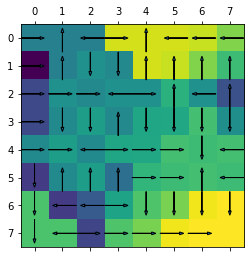

In [18]:
agent_2.clear()
agent_2.set_gamma(0.75)
while True:
    V = agent_2.evaluate_policy()
    # print(V)

    stable = agent_2.update()

    if stable == True:
        break
        
print(np.reshape(agent_2.V,Env.shape))
plot(Env,agent_2.policy,agent_2.V)

### $\gamma = 1$

[[-3.57039384 -3.37276099 -3.02796805 -2.99133828 -2.96940232 -2.9150723
  -2.82325816 -2.92320722]
 [-3.63715377 -3.02796805 -2.4559645  -2.56737406 -2.79601271 -2.49973572
  -2.26182221 -2.19984323]
 [-3.03283485 -2.4559645  -2.32266296 -2.34249321 -2.04451313 -2.18757001
  -1.54756155 -1.86418034]
 [-2.74980583 -2.20831698 -1.93757149 -1.87011186 -1.40942913 -1.25774406
  -1.00779558 -1.18170867]
 [-2.20831698 -1.93757149 -1.87011186 -1.40942913 -1.25774406 -1.00779558
  -0.92164714 -0.79313532]
 [-2.9372657  -2.20831698 -1.89623918 -1.73843138 -0.76431002 -0.92164714
  -0.79313532 -0.60991696]
 [-2.47427722 -2.33656422 -1.73843138 -0.76431002 -0.46487131 -0.28775317
  -0.02935994  0.        ]
 [-2.77283074 -1.84293579 -1.28294968 -0.46487131 -0.28775317 -0.02935994
   0.          0.        ]]
[[1 1 2 1 1 2 2 2]
 [2 1 2 2 2 2 2 2]
 [1 1 2 2 2 2 2 2]
 [1 2 2 2 2 2 2 2]
 [1 1 1 1 1 1 2 2]
 [1 0 1 2 2 1 1 2]
 [1 1 1 1 2 2 2 2]
 [1 1 1 1 1 1 1 0]]


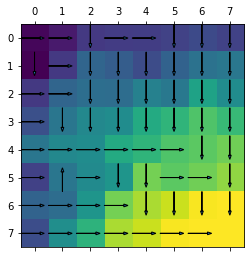

In [19]:
agent_2.clear()
agent_2.set_gamma(1)
while True:
    V = agent_2.evaluate_policy()
    # print(V)

    stable = agent_2.update()

    if stable == True:
        break
        
print(np.reshape(agent_2.V,Env.shape))
plot(Env,agent_2.policy,agent_2.V)

# Question- 3

## Part-b

In [20]:
Gambler_env = env.Gambler_env()
Gambler_env.set_p_h(0.3)
agent_1 = agent.Gambler_ValueIteration(Gambler_env)
Gambler_env.set_p_h(0.15)
agent_2 = agent.Gambler_ValueIteration(Gambler_env)
Gambler_env.set_p_h(0.65)
agent_3 = agent.Gambler_ValueIteration(Gambler_env)

In [21]:
def plot_fig1(y):
    x = range(100)
    
    for i in range(1,len(y)):
        plt.plot(x,y[i][:100])
    plt.show()

In [22]:
def plot_fig2(policy):
    x = range(100)
    
    plt.bar(x,policy)
    
    plt.show()
    

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11. 10.  9.  8.
 18.  6.  5.  4.  3.  2.  1. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 35.
 11. 37. 12. 39. 10.  9.  8.  7.  6.  5.  4.  3.  2.  1. 50.  1.  2.  3.
  4.  5.  6.  7. 42.  9. 10. 11. 12. 37. 14. 10.  9.  8.  7.  6.  5.  4.
 28.  2.  1. 25.  1. 23.  3.  4.  5.  6.  7.  8.  9. 10. 11. 13. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]
[0.00000000e+00 2.66825695e-04 8.89418985e-04 1.92321616e-03
 2.96542465e-03 4.32121111e-03 6.41072053e-03 8.50274071e-03
 9.88474885e-03 1.18309083e-02 1.44047317e-02 1.77662301e-02
 2.13690684e-02 2.71865696e-02 2.83462513e-02 3.00248478e-02
 3.29507838e-02 3.52816358e-02 3.94363611e-02 4.60303903e-02
 4.80173934e-02 5.16966588e-02 5.92210648e-02 6.31876611e-02
 7.12302281e-02 9.00000000e-02 9.06225933e-02 9.20753110e-02
 9.44875044e-02 9.69193242e-02 1.00082826e-01 1.04958348e-01
 1.09839728e-01 1.13064414e-01 1.17605453e-01 1.23611041e-01
 1.31454537e-01 1.39861160e-01 1.53435329e-0

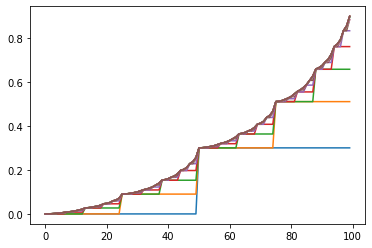

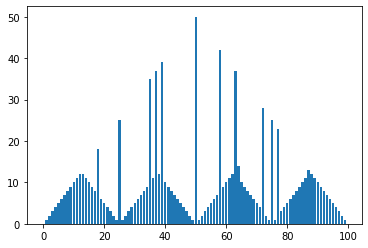

In [23]:
agent_1.clear()
y = []
while True:

    agent_1.reset()
    agent_1.update()
    
    y.append(agent_1.V)

    if agent_1.get_delta() < agent_1.get_threshold():
        break
        
policy = agent_1.get_policy()
print(agent_1.get_policy())
print(agent_1.V)

plot_fig1(y)
plot_fig2(policy)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11. 10.  9.  8.
  7.  6.  5.  4.  3.  2.  1. 25.  1.  2.  3.  4.  5.  6. 32.  8.  9. 10.
 11. 13. 38. 11. 10.  9.  8.  7.  6.  5.  4.  3.  2. 49. 50.  1.  2.  3.
  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 11. 10. 16.  8.  7.  6.  5.  4.
  3.  2.  1. 25.  1.  2.  3.  4.  5.  6. 18. 17.  9. 10. 11. 13. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]
[0.00000000e+00 1.92759560e-06 1.28536475e-05 3.73999231e-05
 8.57080408e-05 1.42805249e-04 2.49880557e-04 5.10991667e-04
 5.71386939e-04 6.72316904e-04 9.52034995e-04 1.30250559e-03
 1.66587038e-03 3.37663800e-03 3.40670777e-03 3.49636996e-03
 3.80934292e-03 3.94646937e-03 4.48212975e-03 6.24514185e-03
 6.34689997e-03 6.72948446e-03 8.68337057e-03 9.09506179e-03
 1.11058025e-02 2.25000000e-02 2.25109230e-02 2.25728373e-02
 2.27119329e-02 2.29856789e-02 2.33092297e-02 2.39159898e-02
 2.53956194e-02 2.57378593e-02 2.63097958e-02 2.78948650e-02
 2.98808650e-02 3.19399321e-02 4.16342820e-0

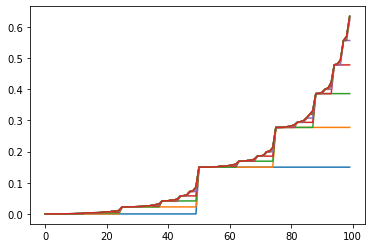

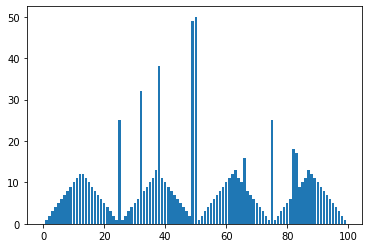

In [24]:
agent_2.clear()
y = []
while True:

    agent_2.reset()
    agent_2.update()
    
    y.append(agent_2.V)

    if agent_2.get_delta() < agent_2.get_threshold():
        break
        
policy = agent_2.get_policy()
print(policy)
print(agent_2.V)

plot_fig1(y)
plot_fig2(policy)

[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[0.         0.46137334 0.70981407 0.84360309 0.91565822 0.9544721
 0.97538609 0.98666051 0.99274307 0.99602866 0.99780691 0.99877234
 0.99929903 0.99958853 0.99974948 0.99984048 0.9998932  0.99992476
 0.99994446 0.99995737 0.99996628 0.99997274 0.99997763 0.99998147
 0.99998454 0.99998706 0.99998911 0.99999081 0.9999922  0.99999336
 0.99999432 0.99999513 0.9999958  0.99999638 0.99999686 0.99999728
 0.99999763 0.99999794 0.9999982  0.99999843 0.99999862 0.9999988
 0.99999894 0.99999907 0.99999919 0.99999929 0.99999938 0.99999945
 0.99999952 0.99999958 0.99999963 0.99999968 0.99999972 0.99999975
 0.99999978 0.99999981 0.99999984 0.99999986 0.99999987 0.99999989
 0.99999991 0.99999992 0.9

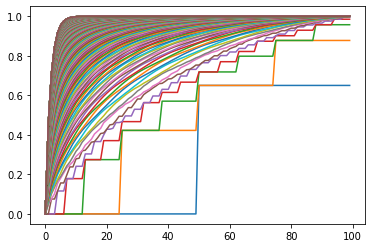

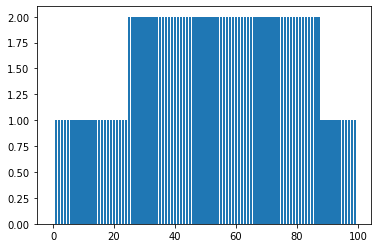

In [25]:
agent_3.clear()
y = []
while True:

    agent_3.reset()
    agent_3.update()

    y.append(agent_3.V)
    if agent_3.get_delta() < agent_3.get_threshold():
        break
        
policy = agent_3.get_policy()
print(policy)
print(agent_3.V)

plot_fig1(y)
plot_fig2(policy)

[ 0.  0.  0.  0.  3.  2.  1.  6.  1.  1.  3.  2.  1. 12.  1.  1.  3.  2.
  1.  6.  1.  1.  3.  2.  1. 25.  1.  1.  1.  3.  2.  1.  6.  1.  1. 34.
 33. 32. 12. 11. 10. 41. 40. 39.  6.  5.  4. 47. 46. 45. 50.  1.  1.  1.
  3.  2.  1.  6.  1.  1.  9.  8.  7. 12.  1.  1.  3.  2.  1.  6.  1.  1.
  3.  2.  1. 25.  1.  1.  1.  3.  2.  1.  6.  1.  1.  3.  2.  1. 12.  1.
  1.  3.  2.  1.  6.  1.  1.  3.  2.  1.]
[0.     0.     0.     0.     0.     0.     0.     0.0081 0.0081 0.0081
 0.0081 0.0081 0.0081 0.027  0.027  0.027  0.027  0.027  0.027  0.0459
 0.0459 0.0459 0.0459 0.0459 0.0459 0.09   0.09   0.09   0.09   0.09
 0.09   0.09   0.1089 0.1089 0.1089 0.1089 0.1089 0.1089 0.153  0.153
 0.153  0.153  0.153  0.153  0.1971 0.1971 0.1971 0.1971 0.1971 0.1971
 0.3    0.3    0.3    0.3    0.3    0.3    0.3    0.3189 0.3189 0.3189
 0.3189 0.3189 0.3189 0.363  0.363  0.363  0.363  0.363  0.363  0.4071
 0.4071 0.4071 0.4071 0.4071 0.4071 0.51   0.51   0.51   0.51   0.51
 0.51   0.51   0.5541 0.5541 0

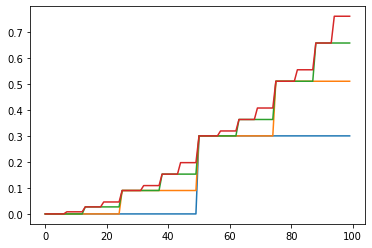

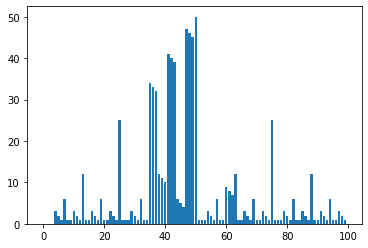

In [26]:
agent_1.set_threshold(0.1)
agent_1.clear()
y = []
while True:

    agent_1.reset()
    agent_1.update()

    y.append(agent_1.V)
    if agent_1.get_delta() < agent_1.get_threshold():
        break
        
policy = agent_1.get_policy()
print(policy)
print(agent_1.V)

plot_fig1(y)
plot_fig2(policy)